"""

@Author: Rikesh Chhetri

@Date: 2021-08-26

@Last Modified by: Rikesh Chhetri

@Last Modified time: 2021-08-26 07:03:30

@Title : Program to insert a cpu log data.csv file from hdfs into hive database using pyhive library,and perform different query and also do visualization of the result.

"""

In [ ]:
from pyhive import hive
import seaborn as sns
import pandas as pd
from loghandler import logger
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv(".env")


In [ ]:
host_name = os.getenv("HOST_NAME")
port = os.getenv("PORT")

# Creating connection with Hive

In [ ]:
try:
    conn = hive.Connection(host=host_name,port=port,database='test')
    df = pd.read_sql("select user_name ,count('') as total from test_data where keyboard !=0.0 or mouse!=0.0 group by user_name",conn)
    print(df)
except Exception as e:
    logger.error(e)

# Finding users with lowest number of average hours

## To Get Total Working Seconds

In [ ]:
lowest_work_sec=pd.read_sql("select user_name ,((((count('')-1)*5)*60)/6) as working_sec from test_data where keyboard!=0.0 or mouse!=0.0 group by user_name",conn)
lowest_average_work_hour = lowest_work_sec.sort_values('working_sec')
print(lowest_average_work_hour)


## Converting working seconds to hour

In [ ]:
lowest_average_work_hour = lowest_work_sec[["user_name","working_sec"]]
lowest_average_work_hour["working_sec"]= pd.to_datetime(lowest_average_work_hour['working_sec'] ,unit='s').dt.strftime("%H:%M")
lowest_average_work_hour = lowest_average_work_hour.sort_values('working_sec')
lowest_average_work_hour.rename(columns={'working_sec': 'working_hour'}, inplace=True)
print(lowest_average_work_hour)

# Finding users with highest number of average hours

## Getting Highest Average Seconds

In [ ]:
highest_work_sec=pd.read_sql("select user_name ,((((count('')-1)*5)*60)/6) as working_sec from test_data  where keyboard!=0.0 or mouse!=0.0 group by user_name",conn)
highest_work_sec= highest_work_sec.sort_values(by='working_sec',ascending=False)
print(highest_work_sec)

## Converting Seconds To Hours

In [ ]:
highest_average_work_hour = highest_work_sec[["user_name","working_sec"]]
highest_average_work_hour["working_sec"]= pd.to_datetime(highest_average_work_hour['working_sec'] ,unit='s').dt.strftime("%H:%M")
highest_average_work_hour = highest_average_work_hour.sort_values('working_sec',ascending=False)
highest_average_work_hour.rename(columns={'working_sec': 'avg_hour'}, inplace=True)
print(highest_average_work_hour)

# Visualization with Matplotlib

## Pie chart and bar chart for work hours

In [ ]:
username= highest_work_sec['user_name']
work=highest_work_sec['working_sec']

In [ ]:
try:
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize=(6,12))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(work,labels=username,autopct='%1.1f%%',startangle=140,explode= explode)
    plt.title('Avg Hours By Person',bbox={'facecolor':'1', 'pad':4})

except Exception as e:
    logger.error(e)

In [ ]:
try:
    df = highest_work_sec
    plt.figure(figsize = (8,5))
    sns.barplot(x = 'user_name',y='working_sec',data = df)
    plt.title("Avg hours by person")
    plt.ylim(0,25000)
    plt.xticks(rotation='vertical')
    plt.show()
except Exception as e:
    logger.error(e)

# User And Their Counts

In [ ]:
user_count=pd.read_sql("select user_name, count('') as total_count from test_data group by user_name",conn)
print(user_count)

# Display users and their record counts with barplot

In [ ]:
try:
    df = user_count
    plt.figure(figsize = (8,7))
    sns.barplot(x = 'total_count',y='user_name',data = df)
    plt.title('Users and their Record Counts ')
    plt.xlim(0,700)
    plt.show()
except Exception as e:
    logger.error(e)

# Plotting pie chart for users and their record counts

In [ ]:
try:
    
    user_data = user_count["user_name"]
    count_data = user_count["total_count"]

    fig = plt.figure(figsize=(10,8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    # Plot
    plt.pie(count_data,labels = username,autopct='%1.1f%%',startangle=90,explode=explode,)
    plt.title('Users and their Record Counts',bbox={'facecolor':'1', 'pad':4})
except Exception as e:
    logger.error(e)

# Finding users with highest numbers of idle hours

In [16]:
idle_count = pd.read_sql("select user_name ,count('') as total from test_data where keyboard=0.0 and mouse=0.0 group by user_name",conn)
print(idle_count)

                      user_name  total
0  bhagyashrichalke21@gmail.com    121
1         damodharn21@gmail.com     62
2       deepshukla292@gmail.com     90
3            iamnzm@outlook.com    155
4     markfernandes66@gmail.com    119
5         rahilstar11@gmail.com    152
6      salinabodale73@gmail.com    129
7         sharlawar77@gmail.com    123


## Get idle time in secs

In [17]:
highest_idle_time = pd.read_sql("select user_name ,((((count('')-1)*5)*60)/6) as idle_sec from test_data where keyboard=0.0 and mouse=0.0 group by user_name",conn)
highest_idle_time=highest_idle_time.sort_values(by='idle_sec',ascending=False)
print(highest_idle_time)

                      user_name  idle_sec
3            iamnzm@outlook.com    7700.0
5         rahilstar11@gmail.com    7550.0
6      salinabodale73@gmail.com    6400.0
7         sharlawar77@gmail.com    6100.0
0  bhagyashrichalke21@gmail.com    6000.0
4     markfernandes66@gmail.com    5900.0
2       deepshukla292@gmail.com    4450.0
1         damodharn21@gmail.com    3050.0


# Converting Idle secs to hour

In [18]:
idle_hour = highest_idle_time[["user_name","idle_sec"]]
idle_hour["idle_sec"]= pd.to_datetime(idle_hour['idle_sec'] ,unit='s').dt.strftime("%H:%M")
idle_hour = idle_hour.sort_values('idle_sec',ascending=False)
idle_hour.rename(columns={'idle_sec': 'idle_hour'}, inplace=True)
print(idle_hour)

                      user_name idle_hour
3            iamnzm@outlook.com     02:08
5         rahilstar11@gmail.com     02:05
6      salinabodale73@gmail.com     01:46
7         sharlawar77@gmail.com     01:41
0  bhagyashrichalke21@gmail.com     01:40
4     markfernandes66@gmail.com     01:38
2       deepshukla292@gmail.com     01:14
1         damodharn21@gmail.com     00:50


# Visualization for idle time

## Pie chart and bar chart for idle time

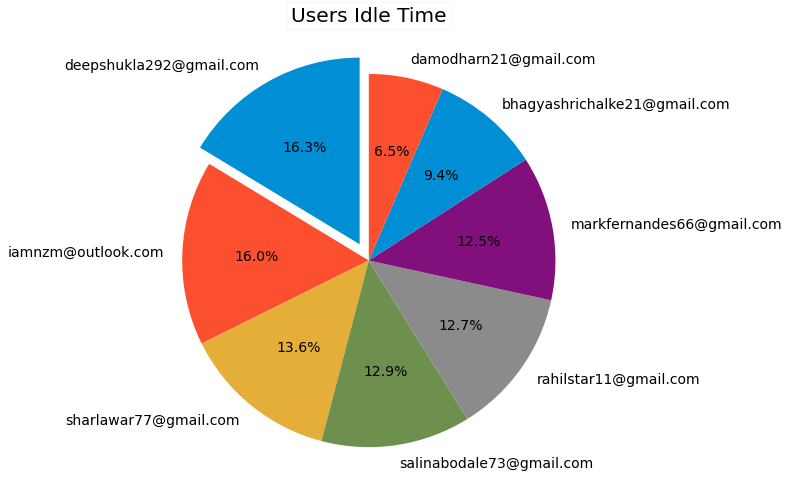

In [19]:
try:
    
    user_data = highest_idle_time["user_name"]
    count_data = highest_idle_time["idle_sec"]

    fig = plt.figure(figsize=(10,8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    # Plot
    plt.pie(count_data,labels = username,autopct='%1.1f%%',startangle=90,explode=explode,)
    plt.title('Users Idle Time',bbox={'facecolor':'1', 'pad':4})
except Exception as e:
    logger.error(e)

## Bar chart and bar chart for idle time

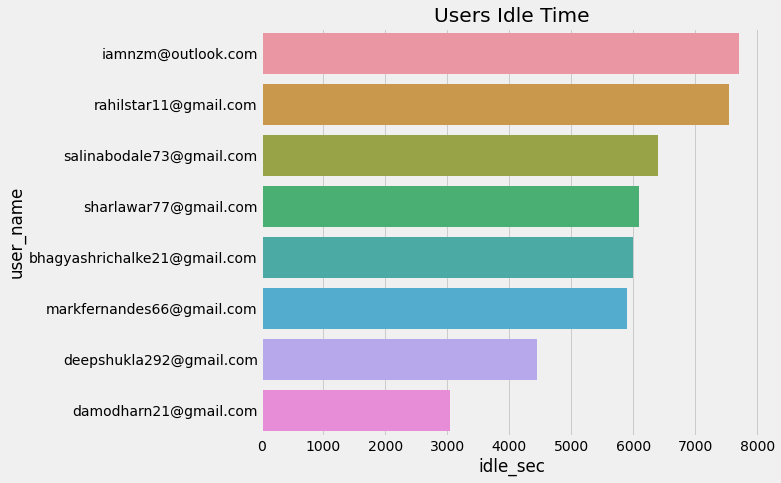

In [20]:
try:
    df = highest_idle_time
    plt.figure(figsize = (8,7))
    sns.barplot(x = 'idle_sec',y='user_name',data = df)
    plt.title('Users Idle Time')
    plt.show()
except Exception as e:
    logger.error(e)